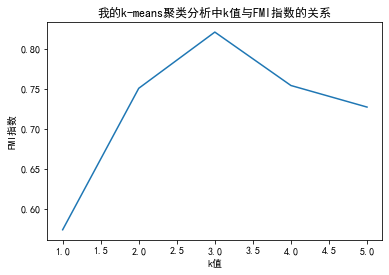

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

class K_means:                                          # 理论上可以对任意维度的数据集进行聚类分析（没测试过）
    def __init__(self, data, k_arr):
        self.shape = data.shape[1]-1
        self.trainingSet = data[range(0, self.shape)]
        self.trainingSet[self.shape] = 0
        fmi = []
        for k in k_arr:
            self.clusterCenter = data[range(0, self.shape)].sample(k).reset_index(drop=True)
            while self.cluster(k):                                                                      # 结束条件为：所有点的类别未发生变动
                self.reset_center(k)
            a, b, c = 0, 0, 0
            for i in range(0, len(self.trainingSet)-1):
                for j in range(i+1, len(self.trainingSet)):
                    if self.trainingSet.loc[i, self.shape] == self.trainingSet.loc[j, self.shape]:
                        b += 1
                    if data.loc[i, self.shape] == data.loc[j, self.shape]:
                        c += 1
                    if self.trainingSet.loc[i, self.shape] == self.trainingSet.loc[j, self.shape] and data.loc[i, self.shape] == data.loc[j, self.shape]:
                        a += 1
            fmi.append((a**2/b/c)**(1/2))                                                               # 计算FMI指数
        plt.rcParams['font.sans-serif'] = ['SimHei']                                                    # 设置字体
        plt.rcParams['font.serif'] = ['SimHei']
        plt.plot(k_arr, fmi)
        plt.title('我的k-means聚类分析中k值与FMI指数的关系')
        plt.xlabel("k值")
        plt.ylabel("FMI指数")

    def cluster(self, k):                                                           # 进行一次聚类
        end = False
        for i in range(0, k):
            for j in range(0, self.shape):                                          # 计算距离
                if not j:
                    a = (self.trainingSet[j] - self.clusterCenter.loc[i][j]) ** 2
                else:
                    a += (self.trainingSet[j] - self.clusterCenter.loc[i][j]) ** 2
            if not i:                                                               # 将到各中心的距离组成dataframe形式
                df = pd.DataFrame(a)
            else:
                df = pd.concat([df, a], axis=1, ignore_index=True)
        for i in range(0,len(df)):                                                  # 计算距离最小的聚类中心
            if self.trainingSet.loc[i, self.shape] != np.random.choice(df.loc[i][df.loc[i] == df.loc[i].min()].index):
                end = True
                self.trainingSet.loc[i, self.shape] = np.random.choice(df.loc[i][df.loc[i] == df.loc[i].min()].index)
        return end                                                                  # 返回：各点的类别是否发生变动

    def reset_center(self, k):                                                      # 重新定位聚类中心
        for i in range(0, k):
            for j in range(0, self.shape):
                self.clusterCenter.loc[i, j] = self.trainingSet[self.trainingSet[self.shape] == i][j].mean()

data = pd.read_csv('数据集/iris/iris.data', header=None)
k = K_means(data, range(1,6))


Text(0, 0.5, 'FMI指数')

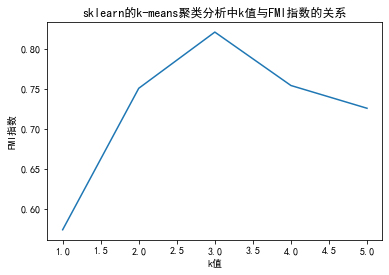

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import fowlkes_mallows_score

y = []
for i in range(1, 6):
    y.append(fowlkes_mallows_score(data[4], KMeans(i).fit(data[range(0, 4)]).labels_))
plt.plot(range(1, 6), y)
plt.title('sklearn的k-means聚类分析中k值与FMI指数的关系')
plt.xlabel("k值")
plt.ylabel("FMI指数")